# Bikers on the Fremont bridge
Example adapted from the [Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)

## Set up: Download (and load) data

In [3]:
# Download data(you can download it by uncommenting and runing this line of code)
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler       # scaling data
from sklearn.model_selection import train_test_split # splitting data
from sklearn.neighbors import KNeighborsRegressor    # regressor
from sklearn.model_selection import GridSearchCV     # for grid search
from sklearn.pipeline import make_pipeline           # for making pipelines
%matplotlib inline

In [4]:
# Aggregate data to the daily level
counts = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

# Data Prep: Adding Features

In [5]:
# Load weather data (downloaded from: https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND)
weather = pd.read_csv('data/weather.csv', index_col='DATE', parse_dates=True)

# Create dry_day column
weather['dry_day'] = (weather['PRCP'] == 0).astype(int)

In [6]:
# Join selected weather columns
daily = daily.join(weather[['PRCP', 'dry_day', 'TMIN', 'TMAX']])

(8, 17)

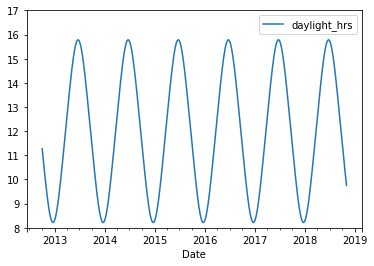

In [7]:
# Compute hours of daylight
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

# Feature Generation: Categorical Variable(s)

In [31]:
# Get dummy variables from categorical columns (alternative: sklearn OneHotEncoding)
daily["day_of_week"] = daily.index.dayofweek.astype("str")
daily = pd.get_dummies(daily)
daily.head()

,Total,PRCP,dry_day,TMIN,TMAX,daylight_hrs,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,...,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,1,46.0,66.0,11.277359,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2012-10-04,3475.0,0.0,1,47.0,66.0,11.219142,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2012-10-05,3148.0,0.0,1,48.0,71.0,11.161038,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2012-10-06,2006.0,0.0,1,46.0,75.0,11.103056,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2012-10-07,2142.0,0.0,1,46.0,75.0,11.045208,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# Abbreviated EDA

Text(0, 0.5, 'Number of bikers')

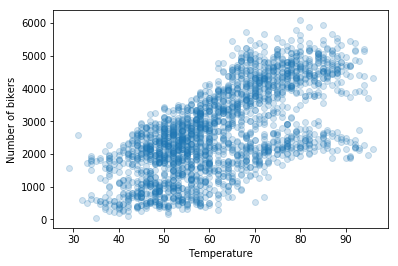

In [35]:
# What is the relationship between bikers and temperature?
plt.scatter(daily.TMAX, daily.Total, alpha=0.2)
plt.xlabel("Temperature")
plt.ylabel("Number of bikers")

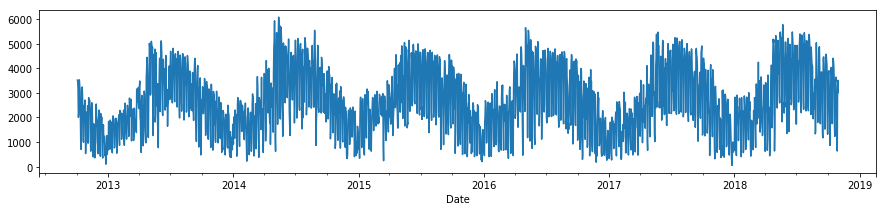

In [28]:
# What is the relationship between bikers and date?
plt.figure(figsize=[15, 3])
daily.Total.plot()

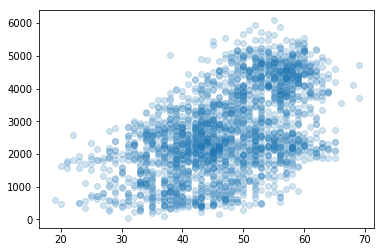

In [29]:
# What is the relationship between bikers and (min) temperature?
plt.scatter(daily.TMIN, daily.Total, alpha=.2)

In [12]:
# What is the distribution of bikers on dry/wet days?
plt.figure()
plt.hist(daily.Total[daily])

(array([ 39.,  73., 134., 214., 155., 130., 196., 220.,  87.,  10.]),
 array([ 260. ,  842.8, 1425.6, 2008.4, 2591.2, 3174. , 3756.8, 4339.6,
        4922.4, 5505.2, 6088. ]),
 <a list of 10 Patch objects>)

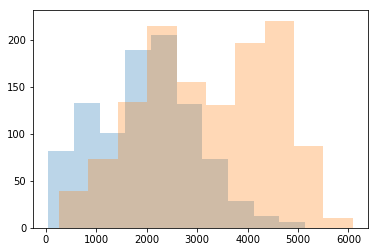

In [39]:
# How does the number of bikers vary by temperature and wet/dry?
#plt.scatter(daily.TMAX, daily.Total, alpha=0.2)
wet_days = daily[daily.dry_day == 0]
dry_days = daily[daily.dry_day == 1]

plt.hist(wet_days.Total, alpha=.3)
plt.hist(dry_days.Total, alpha=.3)

# Modeling: KNN Regressor

In [14]:
# Split data into training and testing data

In [15]:
# Create a scaler and your classifier


# Define a pipeline that uses your scaler and classifier


# Define a grid to search through


# Perform a  grid search of your pipeline


In [16]:
# Compare prediction to (test) data


# Feature Generation: Polynomial Transformations

In [17]:
# Add a polynomial transformation to the pipeline


In [18]:
# Define a pipeline that includes the polynomial transformation


# Define a grid to search through (including the degree of polynomial)


# Perform a  grid search of your pipeline

In [19]:
# Visualize time trends


# Error assessment: find systematic errors

In [20]:
# Why are we getting this wrong?
# Assess error by day of the week


In [21]:
# Assess error by temperature and dry_day


In [22]:
# Assess error by precipitation


# Feature Selection: Select best features
As a form of dimensionality reduction, only select the top percentile features that have a certain threshold of variance.

In [23]:
# Create a percentile selector, add it to the pipeline
# (alternatives a K selectors, PCA, or others)


# Define a grid to search through (including the degree of polynomial AND percentile of best features)


In [24]:
# Fit the model